In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/dogs-breed-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-breed-dataset


In [2]:
import tensorflow as tf

In [3]:
train_dir = "/kaggle/input/dogs-breed-dataset/train/"
test_dir = "/kaggle/input/dogs-breed-dataset/test/"


In [4]:
# Lets view some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(dir, type):
    location = dir + '/' + type
    random_image = random.sample(os.listdir(location), 1)
    img = mpimg.imread(location + '/' + random_image[0])
    plt.imshow(img)
    plt.title(type)
    plt.axis('off');
    
    # print(f"Image shape: {img.shape}")
    return img


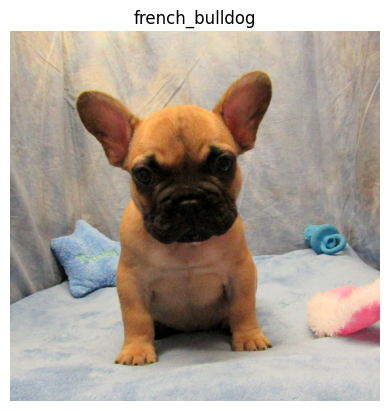

In [5]:
img = view_random_image('/kaggle/input/dogs-breed-dataset/test', 'french_bulldog')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [9]:
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical'
                                              )
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical'
                                              )

Found 824 images belonging to 5 classes.
Found 206 images belonging to 5 classes.


In [10]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D, Flatten
from tensorflow.keras import Sequential


In [11]:
customModel = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        padding =  'valid',
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(5, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
customModel.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

In [13]:
customModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       140,455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,465 (560.41 KB)

 Trainable params: 143,465 (560.41 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Fitting the model
history = customModel.fit(
    train_data,
    epochs = 5,
    validation_data = test_data,
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
I0000 00:00:1731950876.356915     135 service.cc:145] XLA service 0x796840007d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731950876.356979     135 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731950876.356985     135 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
/opt/conda/lib/python3.10/site-packages/PIL/TiffIma

 1/26 ━━━━━━━━━━━━━━━━━━━━ 6:48 16s/step - accuracy: 0.3125 - loss: 1.5778

I0000 00:00:1731950880.890669     135 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1987 - loss: 10.4026 - val_accuracy: 0.2233 - val_loss: 1.6114
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 969ms/step - accuracy: 0.2269 - loss: 1.6077 - val_accuracy: 0.2233 - val_loss: 1.6085
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2278 - loss: 1.6055 - val_accuracy: 0.2330 - val_loss: 1.6085
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 958ms/step - accuracy: 0.2364 - loss: 1.6031 - val_accuracy: 0.2330 - val_loss: 1.6091
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 963ms/step - accuracy: 0.2431 - loss: 1.6054 - val_accuracy: 0.2330 - val_loss: 1.6075


In [16]:
!nvidia-smi

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Mon Nov 18 17:31:07 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             27W /   70W |   14073MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

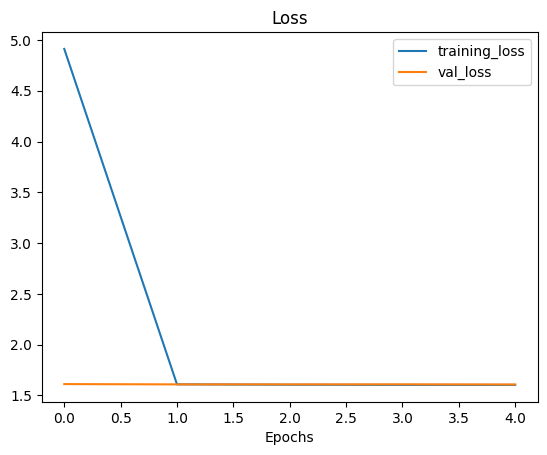

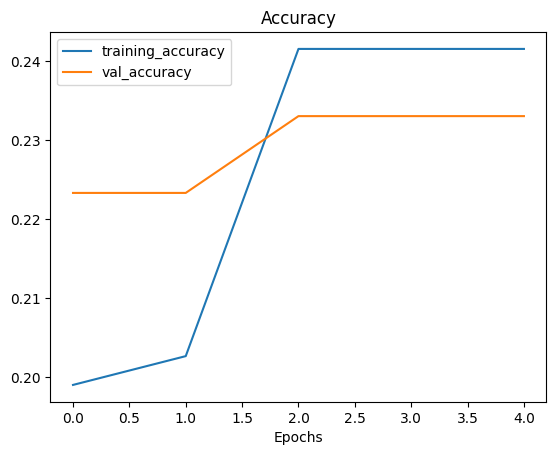

In [17]:
plot_loss_curves(history)

In [19]:
customModel.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 986ms/step - accuracy: 0.2234 - loss: 1.6131


[1.607535481452942, 0.2330097109079361]

# Let's use data augmentation and see if accuracy increases or not

In [21]:
train_datagen_aug = ImageDataGenerator(
    rescale = 1/255. ,
    shear_range = 0.2,
    rotation_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
)

In [23]:
train_data_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 824 images belonging to 5 classes.


In [24]:
test_data

In [27]:
customModel2 = Sequential(
    [Conv2D(filters = 32,
          kernel_size = 3,
          input_shape = (224, 224, 3),
          activation = 'relu'
          ),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation = 'softmax')]
)

In [32]:
customModel2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

In [33]:
customModel2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │         2,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │        28,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,231 (141.53 KB)

 Trainable params: 36,231 (141.53 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history2 = customModel2.fit(
    train_data_aug,
    epochs = 10,
    validation_data = test_data
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 3/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2188 - loss: 1.6109

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.2211 - loss: 1.6090 - val_accuracy: 0.2330 - val_loss: 1.6029
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2309 - loss: 1.6051 - val_accuracy: 0.2330 - val_loss: 1.5993
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2537 - loss: 1.5991 - val_accuracy: 0.2330 - val_loss: 1.6025
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2497 - loss: 1.5993 - val_accuracy: 0.2330 - val_loss: 1.6024
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2254 - loss: 1.6038 - val_accuracy: 0.2330 - val_loss: 1.6018
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2505 - loss: 1.5966 - val_accuracy: 0.2330 - val_loss: 1.6008
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2175 - loss: 1.5988 - val_accuracy: 0.2330 - val_loss: 1.6023
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2534 - loss: 1.5881 - val_accuracy: 0.2330 - val_loss: 1.5955
Epo

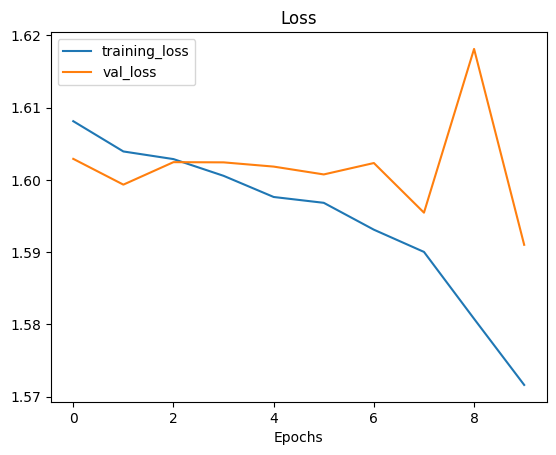

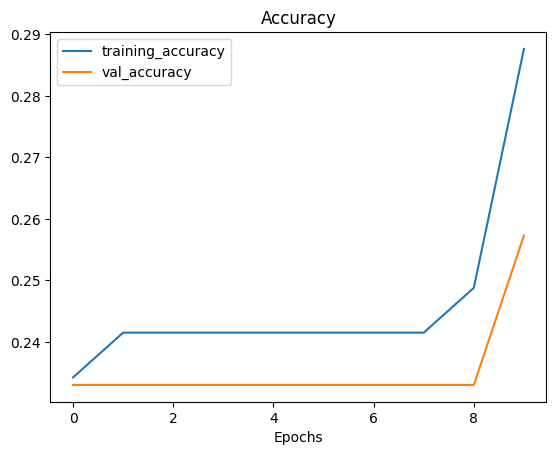

In [37]:
plot_loss_curves(history2)

In [38]:
customModel2.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 927ms/step - accuracy: 0.2422 - loss: 1.6156


[1.5910160541534424, 0.2572815418243408]

# Lets increase the accuracy by Transfer Learning : Feature Extraction

## Using ResNet50

In [39]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0

In [80]:
base_resnet50 = ResNet50(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3)
)

In [ ]:
base_resnet50.summary()

In [81]:
base_resnet50.trainable = True

In [82]:
derivedModel1  = Sequential(
    [base_resnet50,
    MaxPool2D(),
    Flatten(),
    Dense(5, activation = 'softmax')]
)

In [83]:
derivedModel1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [84]:
derivedModel1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [85]:
derivedModel1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [86]:
derivedhistory1 = derivedModel1.fit(
    train_data_aug,
    epochs = 5,
    validation_data = test_data
)

Epoch 1/5


I0000 00:00:1731954304.530443     135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_28', 20 bytes spill stores, 20 bytes spill loads



26/26 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4262 - loss: 5.6488 - val_accuracy: 0.1165 - val_loss: 40198.0820
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4980 - loss: 2.0895 - val_accuracy: 0.2330 - val_loss: 3604.0896
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5513 - loss: 1.0894 - val_accuracy: 0.2330 - val_loss: 43.4522
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6934 - loss: 0.8379 - val_accuracy: 0.2087 - val_loss: 2.3173
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6897 - loss: 0.7960 - val_accuracy: 0.2087 - val_loss: 2.5294


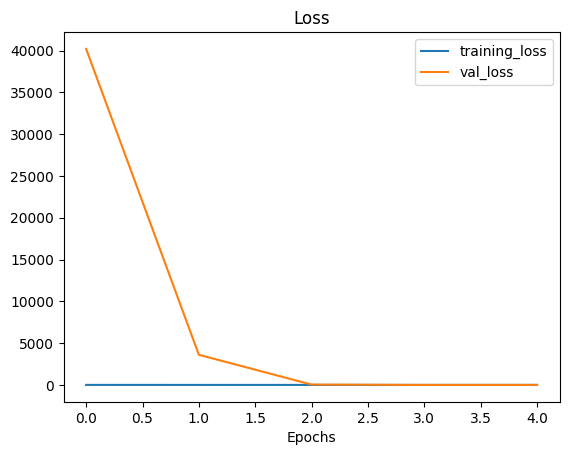

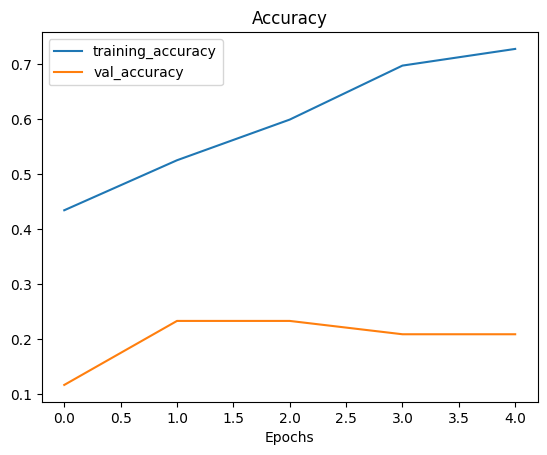

In [87]:
plot_loss_curves(derivedhistory1)

In [88]:
derivedModel1.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 867ms/step - accuracy: 0.1608 - loss: 2.6578


[2.5293519496917725, 0.20873786509037018]

## Using EfficientNetB0

In [64]:
base_efficientb0 = EfficientNetB0(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3)
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [65]:
base_efficientb0.trainable = True

In [66]:
derivedModel2 = Sequential([
    base_efficientb0,
    MaxPool2D(),
    Flatten(),
    Dense(5, activation = 'softmax')
])

In [67]:
derivedModel2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [69]:
derivedModel2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 1280)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │        57,605 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,237,484 (46.68 MB)

 Trainable params: 4,065,153 (15.51 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 8,130,308 (31.01 MB)

In [70]:
derivedhistory2 = derivedModel2.fit(
    train_data_aug,
    epochs = 5,
    validation_data = test_data
)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.6096 - loss: 1.5929 - val_accuracy: 0.2087 - val_loss: 2.0589
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8575 - loss: 0.4292 - val_accuracy: 0.1165 - val_loss: 1.7578
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9442 - loss: 0.1848 - val_accuracy: 0.2087 - val_loss: 1.9387
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8979 - loss: 0.3911 - val_accuracy: 0.2087 - val_loss: 2.9166
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9266 - loss: 0.2083 - val_accuracy: 0.1165 - val_loss: 2.1112


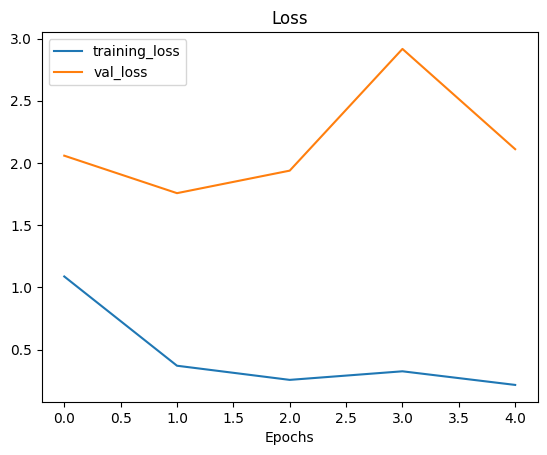

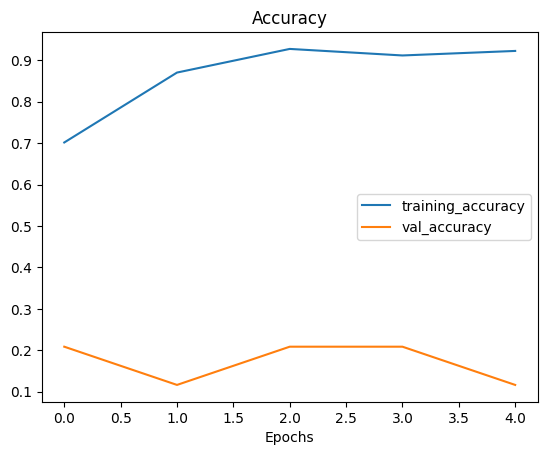

In [71]:
plot_loss_curves(derivedhistory2)

In [72]:
derivedModel2.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 868ms/step - accuracy: 0.1178 - loss: 2.1314


[2.1112112998962402, 0.11650485545396805]

### Let's try without data augmentation

In [74]:
derivedModel3 = tf.keras.models.clone_model(derivedModel2)

In [75]:
derivedModel3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [76]:
derivedhistory3 = derivedModel3.fit(
    train_data,
    epochs = 5,
    validation_data = test_data
)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.1863 - loss: 4.6427 - val_accuracy: 0.1165 - val_loss: 1.6405
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2483 - loss: 2.6189 - val_accuracy: 0.2233 - val_loss: 1.6469
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 976ms/step - accuracy: 0.3249 - loss: 2.1909 - val_accuracy: 0.2233 - val_loss: 1.6183
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 999ms/step - accuracy: 0.3138 - loss: 2.1048 - val_accuracy: 0.2233 - val_loss: 1.6041
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3504 - loss: 1.9816 - val_accuracy: 0.2233 - val_loss: 1.6343


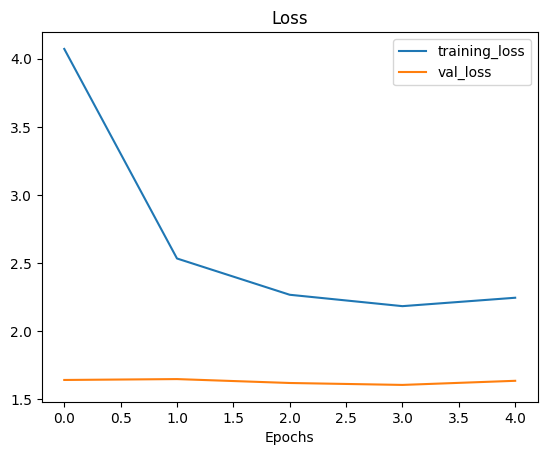

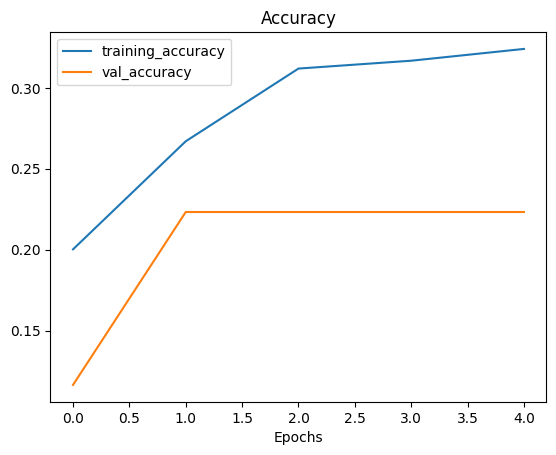

In [77]:
plot_loss_curves(derivedhistory3)

In [79]:
derivedModel3.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2372 - loss: 1.6232


[1.6343481540679932, 0.223300963640213]

# Making Biggest custom model

In [91]:
LargeModel = Sequential(
    [Conv2D(filters = 32,
          kernel_size = 3,
          input_shape = (224, 224, 3),
          activation = 'relu'
          ),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation = 'softmax')]
)

In [92]:
LargeModel.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [94]:
LargeHistory = LargeModel.fit(
    train_data_aug,
    epochs = 20,
    validation_data = test_data,
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2237 - loss: 1.6073 - val_accuracy: 0.2330 - val_loss: 1.6160
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2296 - loss: 1.6123 - val_accuracy: 0.2330 - val_loss: 1.6108
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2451 - loss: 1.5986 - val_accuracy: 0.2330 - val_loss: 1.6074
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2514 - loss: 1.5970 - val_accuracy: 0.2330 - val_loss: 1.5838
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2440 - loss: 1.5792 - val_accuracy: 0.2670 - val_loss: 1.6213
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2521 - loss: 1.6035 - val_accuracy: 0.3010 - val_loss: 1.5195
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3164 - loss: 1.5333 - val_accuracy: 0.3592 - val_loss: 1.4735
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2853 - loss: 1.5249 - val_accuracy: 0.4126 - val_loss:

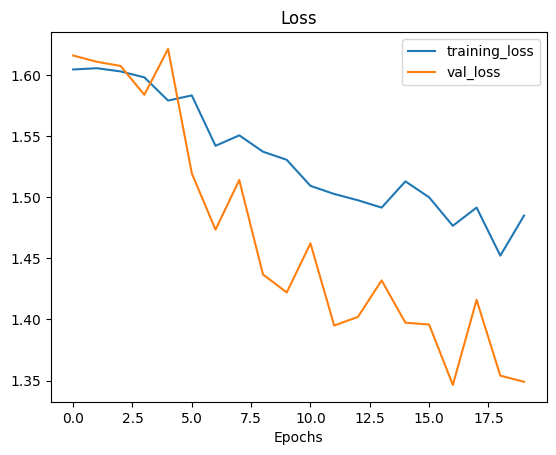

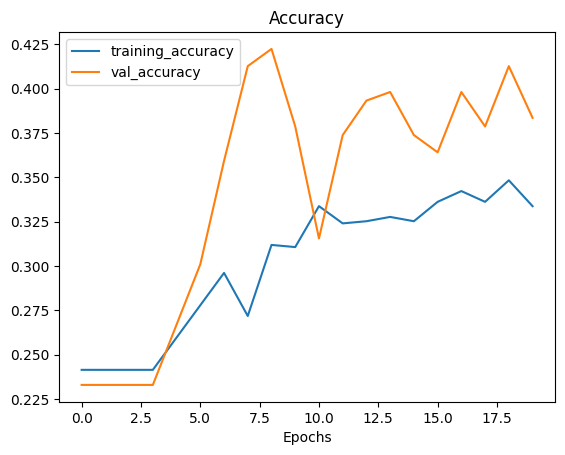

In [95]:
plot_loss_curves(LargeHistory)

In [96]:
LargeModel.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 955ms/step - accuracy: 0.3691 - loss: 1.3726


[1.349018931388855, 0.38349515199661255]